1. 高斯金字塔
* 演示你对高斯金字塔的理解
* 撰写心得体会
> 心得体会：

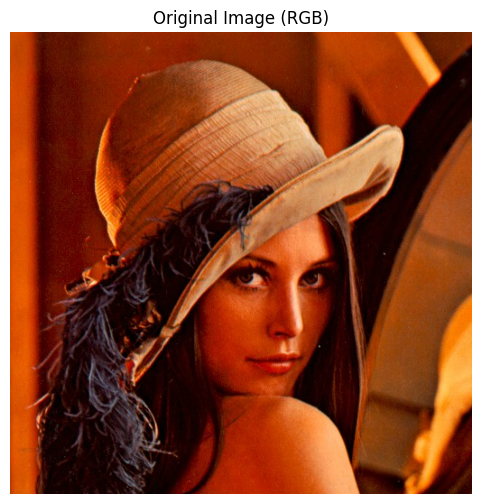

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt  # 用于小波变换

# 读取图像
img = cv2.imread('fig_lena.tif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)  

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')
plt.show()

2. 拉普拉斯金字塔
* 演示你对拉普拉斯金字塔的理解
* 撰写心得体会
> 心得体会：

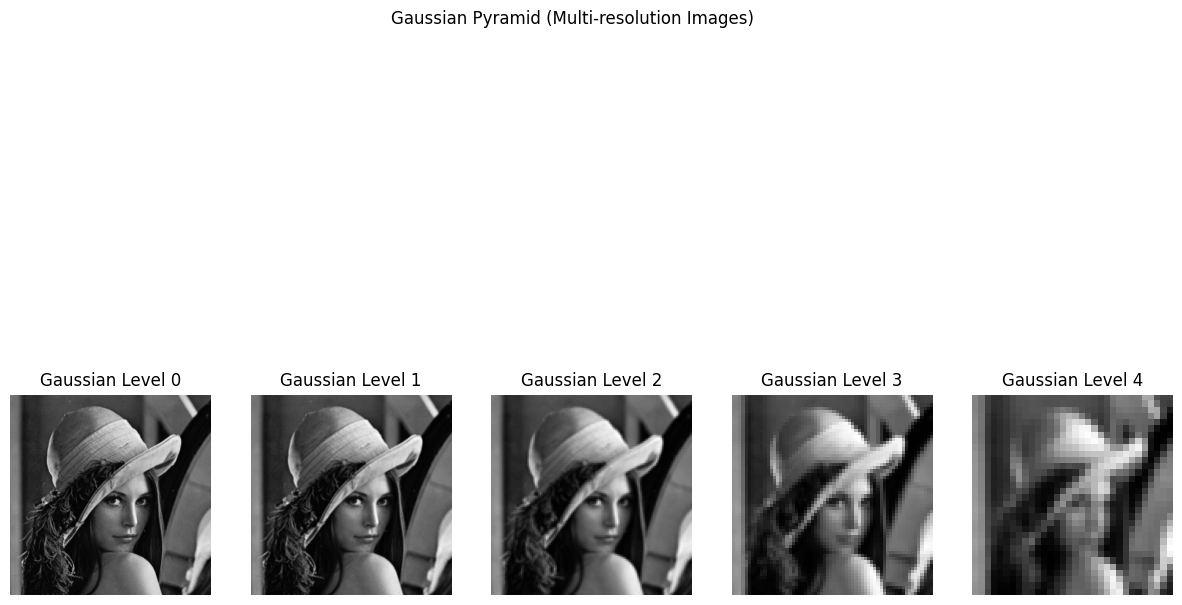

In [2]:
# 代码写在这里
def generate_gaussian_pyramid(image, levels):
    """生成高斯金字塔：每一层对上层高斯模糊后下采样（尺寸减半）"""
    pyramid = [image]
    for i in range(levels):
        next_layer = cv2.pyrDown(pyramid[i])  # OpenCV内置的下采样函数
        pyramid.append(next_layer)
    return pyramid

# 生成4层高斯金字塔
gaussian_levels = 4
gaussian_pyramid = generate_gaussian_pyramid(gray, gaussian_levels)

# 可视化高斯金字塔
plt.figure(figsize=(15, 10))
for i in range(len(gaussian_pyramid)):
    plt.subplot(1, len(gaussian_pyramid), i+1)
    plt.imshow(gaussian_pyramid[i], cmap='gray')
    plt.title(f'Gaussian Level {i}')
    plt.axis('off')
plt.suptitle('Gaussian Pyramid (Multi-resolution Images)')
plt.show()



3. 小波变换
* 演示你对小波变换的理解
* 撰写心得体会
> 心得体会：

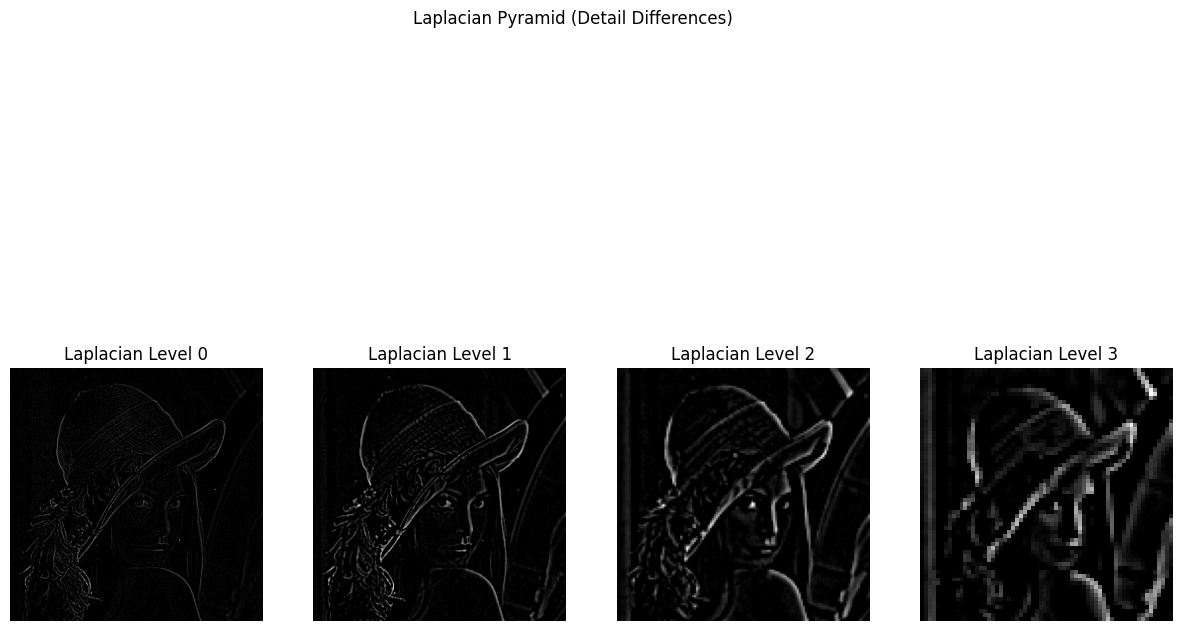

In [3]:
# 代码写在这里

# 代码写在这里
def generate_laplacian_pyramid(gaussian_pyramid):
    """生成拉普拉斯金字塔：高斯层 - 上采样后的下一层高斯层（捕捉细节差）"""
    laplacian_pyramid = []
    levels = len(gaussian_pyramid) - 1
    for i in range(levels):
        # 上采样当前层到上一层的尺寸
        upsampled = cv2.pyrUp(gaussian_pyramid[i+1])
        # 确保尺寸匹配
        if upsampled.shape != gaussian_pyramid[i].shape:
            upsampled = cv2.resize(upsampled, 
                                   (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]))
        # 计算细节差
        laplacian = cv2.subtract(gaussian_pyramid[i], upsampled)
        laplacian_pyramid.append(laplacian)
    return laplacian_pyramid

# 基于高斯金字塔生成拉普拉斯金字塔
laplacian_pyramid = generate_laplacian_pyramid(gaussian_pyramid)

# 可视化拉普拉斯金字塔
plt.figure(figsize=(15, 10))
for i in range(len(laplacian_pyramid)):
    # 拉普拉斯图像含正负值，需归一化到0-255才能显示
    laplacian_norm = cv2.normalize(laplacian_pyramid[i], None, 0, 255, 
                                  cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    plt.subplot(1, len(laplacian_pyramid), i+1)
    plt.imshow(laplacian_norm, cmap='gray')
    plt.title(f'Laplacian Level {i}')
    plt.axis('off')
plt.suptitle('Laplacian Pyramid (Detail Differences)')
plt.show()

